In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'Walmart_Sales_CB1799BACC_77EAC63B5D.xlsx'
walmart_data = pd.read_excel(file_path, sheet_name='Sheet1')

walmart_data['Revenue'] = walmart_data['Unit price'] * walmart_data['Quantity']

walmart_data['Date'] = pd.to_datetime(walmart_data['Date'])

walmart_data['Month'] = walmart_data['Date'].dt.to_period('M')

city_branch_sales = walmart_data.groupby(['City', 'Branch']).agg({'Revenue': 'sum', 'Quantity': 'sum'}).reset_index()


city_branch_avg_price = walmart_data.groupby(['City', 'Branch']).agg({'Unit price': 'mean'}).reset_index()

monthly_analysis = walmart_data.groupby(['Month', 'Product line', 'Gender', 'Payment']).agg({'Revenue': 'sum', 'Quantity': 'sum'}).reset_index()





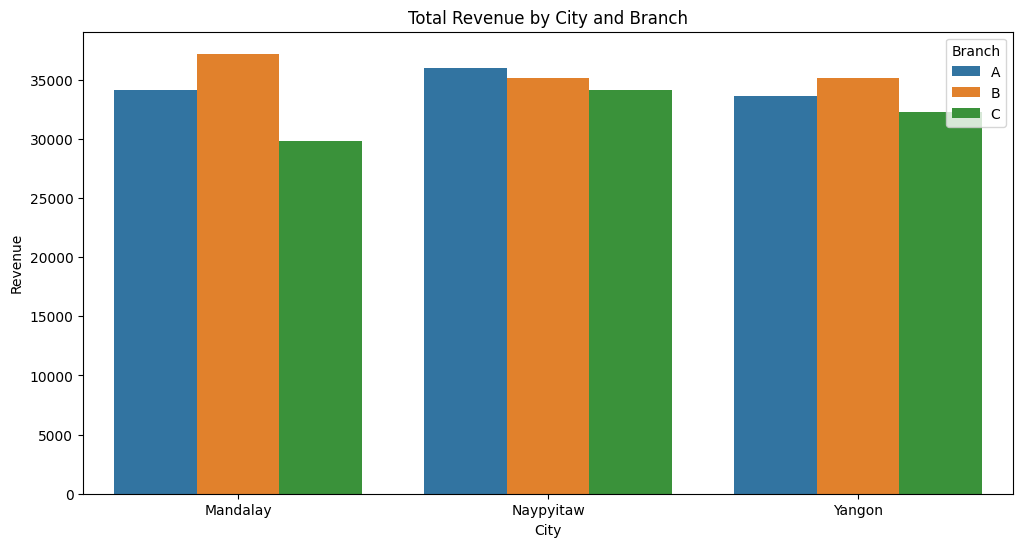

In [3]:
# Total Revenue by City and Branch
plt.figure(figsize=(12, 6))
sns.barplot(data=city_branch_sales, x="City", y="Revenue", hue="Branch")
plt.title("Total Revenue by City and Branch")
plt.ylabel("Revenue")
plt.xlabel("City")
plt.legend(title="Branch")
plt.show()

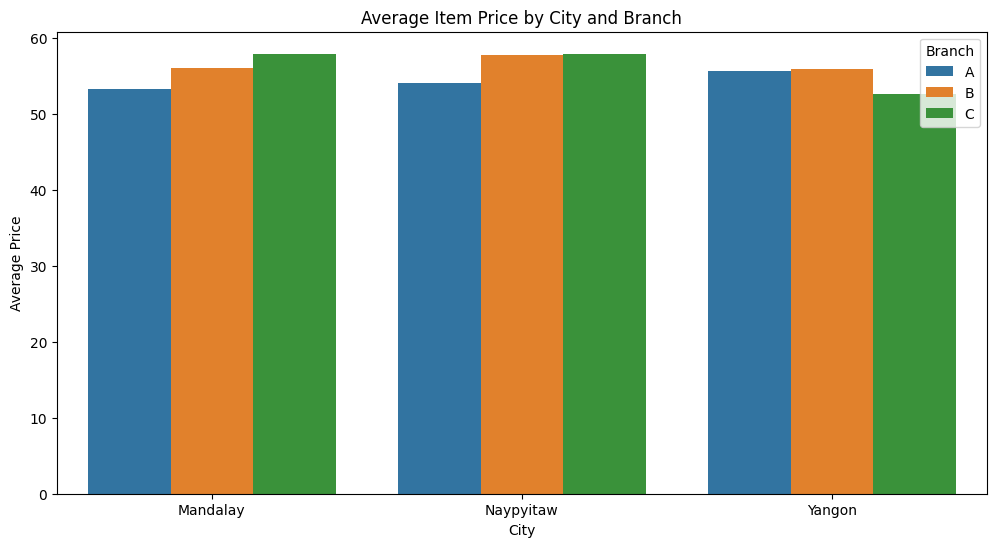

In [4]:

# Average Price of an Item Sold at Each Branch in Each City
plt.figure(figsize=(12, 6))
sns.barplot(data=city_branch_avg_price, x="City", y="Unit price", hue="Branch")
plt.title("Average Item Price by City and Branch")
plt.ylabel("Average Price")
plt.xlabel("City")
plt.legend(title="Branch")
plt.show()


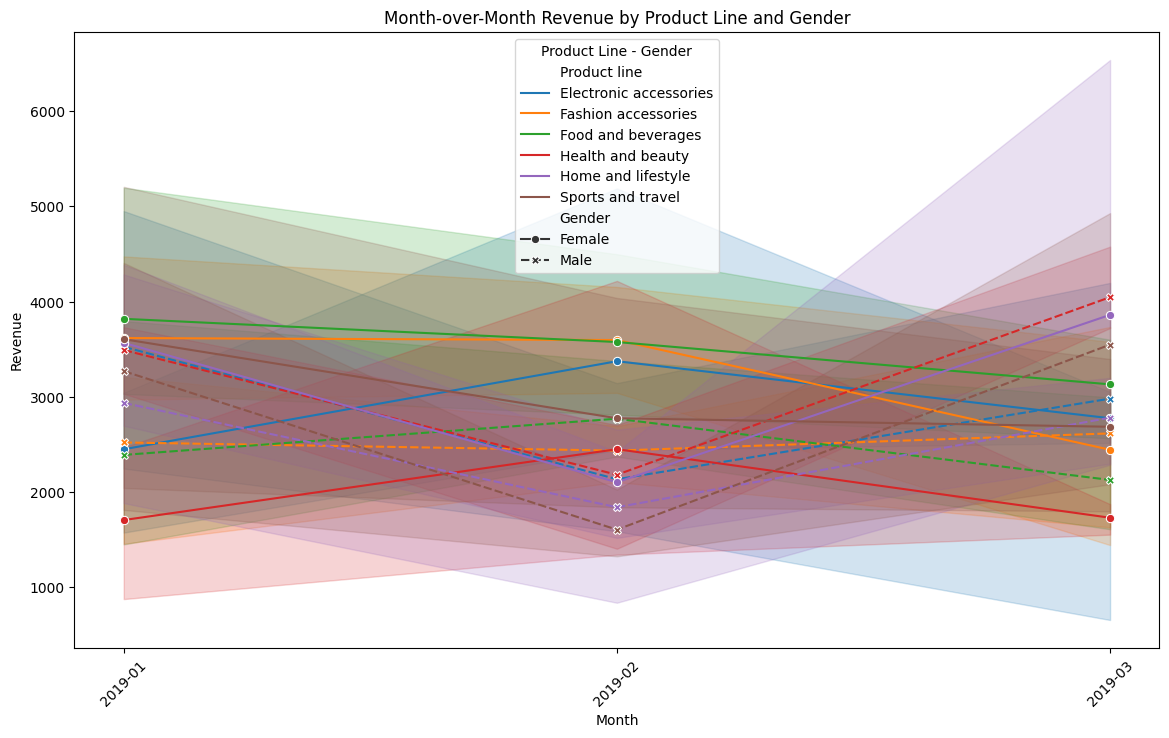

In [5]:
# Month-over-Month Revenue by Product Line and Gender
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_analysis, x=monthly_analysis["Month"].astype(str), y="Revenue", hue="Product line", style="Gender", markers=True)
plt.title("Month-over-Month Revenue by Product Line and Gender")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(title="Product Line - Gender")
plt.show()


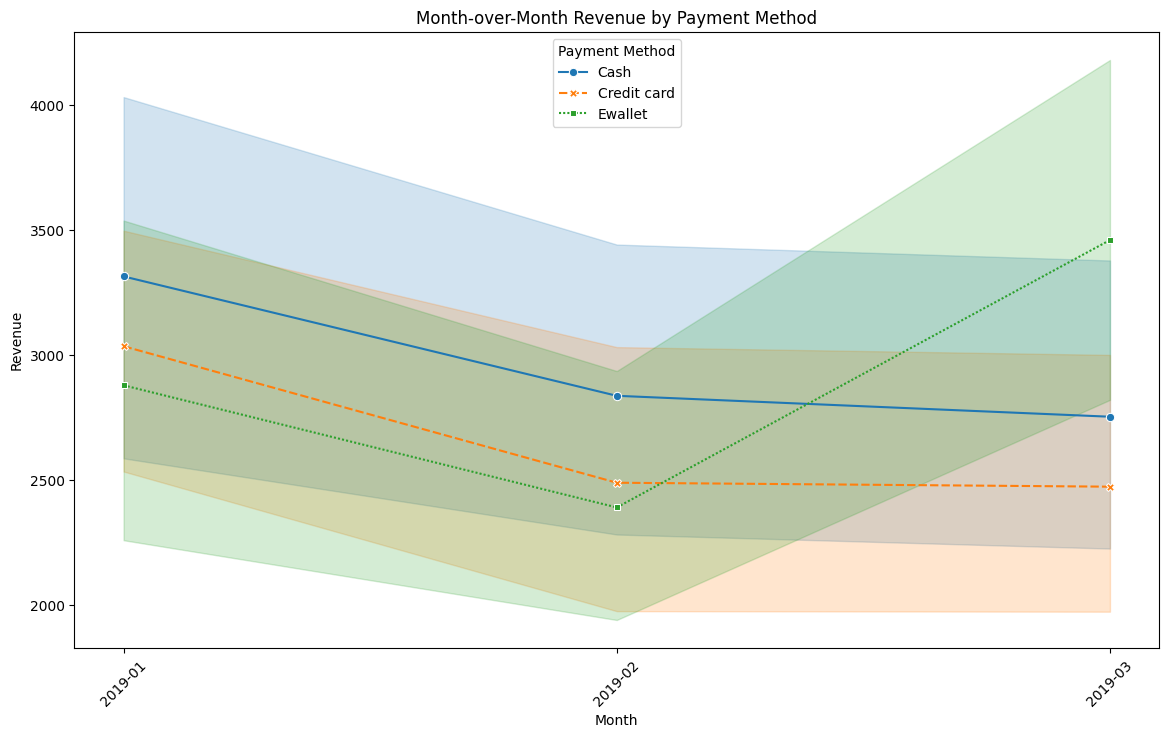

In [6]:
# Month-over-Month Revenue by Payment Method
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_analysis, x=monthly_analysis["Month"].astype(str), y="Revenue", hue="Payment", markers=True, style="Payment")
plt.title("Month-over-Month Revenue by Payment Method")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(title="Payment Method")
plt.show()
